In [1]:

"""
    s = mybasel(N)

Caluclate finite Basel sum
"""
function mybasel(N)
    s = 0.0
    for n = 1:N
        s += 1/(n^2)
    end
    return s
end


mybasel

In [5]:
round(abs(mybasel(1000) - pi^2/6), sigdigits=1)

0.001

In [6]:

function myrichardson(N)
    s1 = mybasel(N)
    s2 = mybasel(2*N)
    return 2*s2 - s1
end

myrichardson (generic function with 1 method)

In [7]:
round(abs(myrichardson(1000) - pi^2/6), sigdigits=1)

2.0e-7

In [19]:
round(abs(mybasel(4000000) - pi^2/6), sigdigits=1)

2.0e-7

In [4]:
] add QuadGK

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed OrderedCollections ─ v1.8.1
   Installed QuadGK ───────────── v2.11.2
   Installed DataStructures ───── v0.19.1
    Updating `/workspaces/phys2200-lectures-jt20012/Project.toml`
  [1fd47b50] + QuadGK v2.11.2
    Updating `/workspaces/phys2200-lectures-jt20012/Manifest.toml`
  [864edb3b] + DataStructures v0.19.1
  [bac558e1] + OrderedCollections v1.8.1
  [1fd47b50] + QuadGK v2.11.2
Precompiling project...
   1751.7 ms  ✓ OrderedCollections
   1683.3 ms  ✓ DataStructures
    789.0 ms  ✓ QuadGK
  3 dependencies successfully precompiled in 7 seconds. 52 already precompiled.


In [5]:

using QuadGK

In [6]:

fun1(x) = 1/sqrt(x)

fun1 (generic function with 1 method)

In [9]:

round(quadgk(fun1, 0, 1)[1],sigdigits=5)

2.0

In [10]:

fun2(x) = exp(-x)*log(x)

fun2 (generic function with 1 method)

In [14]:

quadgk(fun2, 0, Inf)

(-0.5772156640944036, 4.619449696675028e-9)

In [2]:
mybasel(0)

0.0

In [2]:

"""
    t, y = myeulers(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a vector of correspondinig values
of the solution, y(t_i)
"""
function myeulers(fun, a, b, n, y1)
    t = range(a,b,n)
    y = zeros(n)
    h = t[2] - t[1]
    y[1] = y1
    for i = 1:(n-1)
        y[i+1] = y[i] + h*fun(t[i],y[i])
    end
    return t, y
end 

myeulers

In [3]:

a = 0.0
b = 5.0
n = 64
fun(t,y) = exp(-sin(t))-y*cos(t)
y1 = 0
yexact(t) = t*exp(-sin(t))

yexact (generic function with 1 method)

In [4]:

t, y = myeulers(fun, a, b, n, y1);

In [5]:

using PyPlot

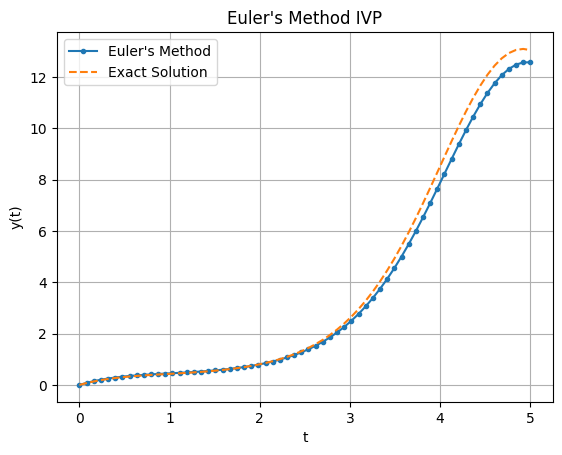

PyObject Text(0.5, 1.0, "Euler's Method IVP")

In [17]:

plot(t, y, label="Euler's Method", marker=".")
plot(t, yexact.(t), label="Exact Solution", linestyle="dashed")
grid(true)
legend()
ylabel("y(t)")
xlabel("t")
title("Euler's Method IVP")

In [6]:
np = 9
hh = zeros(np)
gerr = zeros(np)

for i = 1:np
    n = 2^(i+3)
    t, y = myeulers(fun,a,b,n,y1)
    hh[i] = t[2] - t[1]
    gerr[i] = abs(yexact(b) - y[end])
end

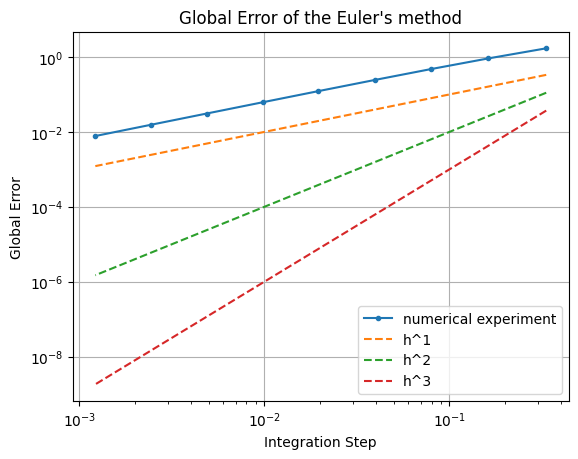

PyObject Text(24.000000000000007, 0.5, 'Global Error')

In [16]:

loglog(hh, gerr, marker=".", label="numerical experiment")
loglog(hh, hh, linestyle="dashed", label="h^1")
loglog(hh, hh.^2, linestyle="dashed", label="h^2")
loglog(hh, hh.^3, linestyle="dashed", label="h^3")
grid(true)
title("Global Error of the Euler's method")
legend()
xlabel("Integration Step")
ylabel("Global Error")